## Predict the tips amount for each diner using the column tip as the target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tips.csv',index_col=0)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## there is no null data in the dataset

In [4]:
df.shape

(244, 7)

In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [8]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

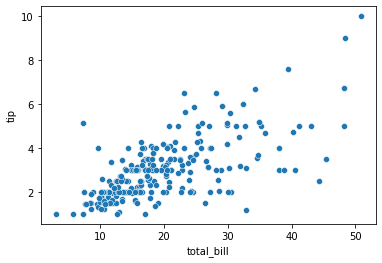

In [9]:
sns.scatterplot(x='total_bill', y='tip', data = df)

## tip increases as total bill increases

<AxesSubplot:xlabel='sex', ylabel='tip'>

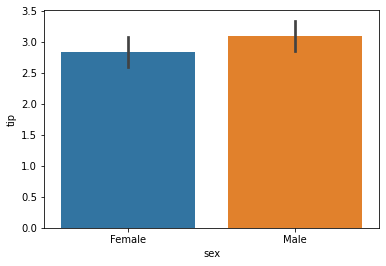

In [10]:
sns.barplot(x='sex', y='tip', data = df)

## As compared to females male are more likely give tips

<AxesSubplot:xlabel='day', ylabel='tip'>

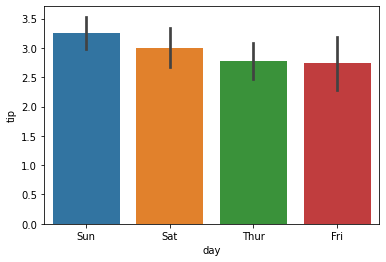

In [11]:
sns.barplot(x='day', y='tip', data = df)

## most of the tips are recieved on sunday 

<AxesSubplot:xlabel='total_bill', ylabel='size'>

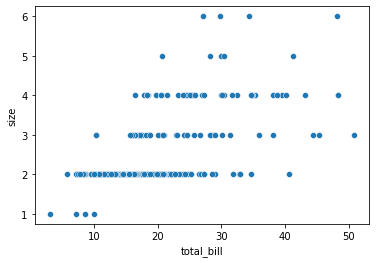

In [12]:
sns.scatterplot(x='total_bill', y='size', data = df)

<AxesSubplot:xlabel='smoker', ylabel='tip'>

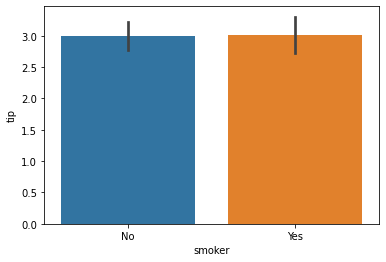

In [13]:
sns.barplot(x='smoker', y='tip', data = df)

<AxesSubplot:xlabel='time', ylabel='tip'>

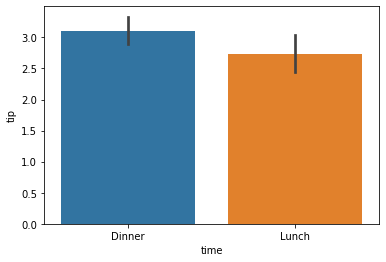

In [14]:
sns.barplot(x='time', y='tip', data = df)

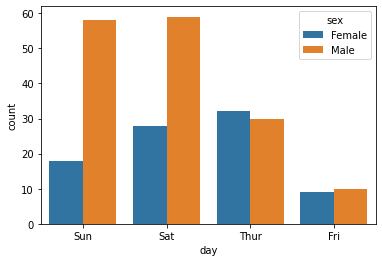

In [15]:
sns.countplot(x='day',data=df,hue='sex')
plt.show()

## at Dinner time, tips are recieved more

## there is categorical data in the dataset which need to be preprocessed and convert into  numerical form

In [16]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df['Male'] = pd.get_dummies(df['sex'],drop_first=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [19]:
df['smoker'] = pd.get_dummies(df['smoker'],drop_first=True)

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male
0,16.99,1.01,Female,0,Sun,Dinner,2,0
1,10.34,1.66,Male,0,Sun,Dinner,3,1
2,21.01,3.50,Male,0,Sun,Dinner,3,1
3,23.68,3.31,Male,0,Sun,Dinner,2,1
4,24.59,3.61,Female,0,Sun,Dinner,4,0


In [21]:
df['Dinner'] = df.time.map({ 'Dinner' : 1, 'Lunch' : 0})

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,Dinner
0,16.99,1.01,Female,0,Sun,Dinner,2,0,1
1,10.34,1.66,Male,0,Sun,Dinner,3,1,1
2,21.01,3.50,Male,0,Sun,Dinner,3,1,1
3,23.68,3.31,Male,0,Sun,Dinner,2,1,1
4,24.59,3.61,Female,0,Sun,Dinner,4,0,1


In [23]:
df['day'] = df.day.map({ 'Sun' : 3, 'Sat' : 2, 'Thur' : 0, 'Fri' : 1})

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,Dinner
0,16.99,1.01,Female,0,3,Dinner,2,0,1
1,10.34,1.66,Male,0,3,Dinner,3,1,1
2,21.01,3.50,Male,0,3,Dinner,3,1,1
3,23.68,3.31,Male,0,3,Dinner,2,1,1
4,24.59,3.61,Female,0,3,Dinner,4,0,1


In [25]:
df.drop(['sex','time'],axis=1 , inplace=True)

In [26]:
df.head()

,total_bill,tip,smoker,day,size,Male,Dinner
0,16.99,1.01,0,3,2,0,1
1,10.34,1.66,0,3,3,1,1
2,21.01,3.50,0,3,3,1,1
3,23.68,3.31,0,3,2,1,1
4,24.59,3.61,0,3,4,0,1


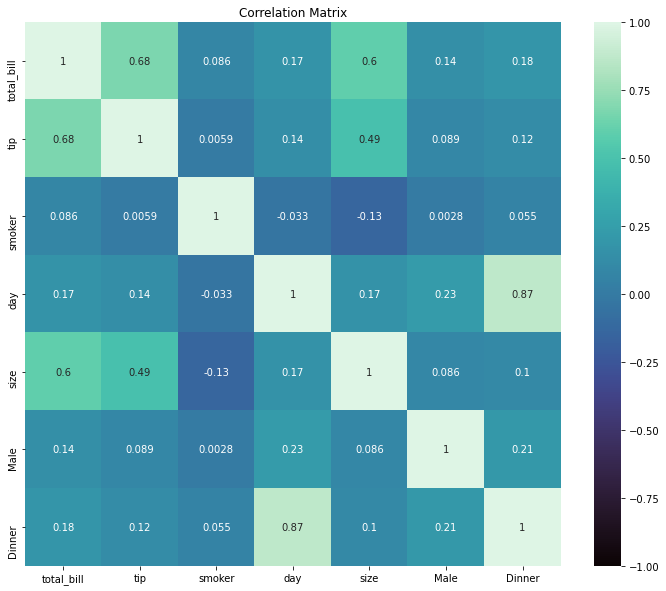

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

In [28]:
Y = df['tip']
X = df.drop(['tip','smoker'], axis=1)

In [29]:
Y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [30]:
X.head()

,total_bill,day,size,Male,Dinner
0,16.99,3,2,0,1
1,10.34,3,3,1,1
2,21.01,3,3,1,1
3,23.68,3,2,1,1
4,24.59,3,4,0,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state = 101)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression().fit(xtrain, ytrain)

In [35]:
model.score(xtest,ytest)*100

31.098026220401554

In [36]:
pd.DataFrame(model.coef_,columns=['Coef'],index= X.columns).sort_values(by='Coef',ascending=False)

,Coef
size,0.193931
total_bill,0.102633
day,-0.005528
Male,-0.024810
Dinner,-0.116048


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [40]:
model_rf.fit(xtrain, ytrain)  

RandomForestRegressor(random_state=0)

In [41]:
model_rf.score(xtest,ytest)*100

24.320674731403702

In [42]:
criterions = ['gini','entropy']
n_est = list(range(5,201,5))
min_splits = [2,4,6,8,10,14,18,20]

params = {'n_estimators':n_est, 'criterion':criterions,'min_samples_split':min_splits}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [45]:
rfr = RandomForestRegressor(random_state = 1)

In [46]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [47]:
g_search.fit(xtrain, ytrain);

In [48]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 7}


In [49]:

g_search.best_estimator_.score(xtest, ytest)*100

43.202857696956464

In [50]:
# g_search.best_estimator_.score(X, Y)

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)]

In [53]:
max_features = ['auto', 'log2']

In [54]:
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]

In [55]:
max_depth.append(None)

In [56]:
bootstrap = [True, False]

In [57]:
r_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'bootstrap': bootstrap}

In [58]:
print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [59]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [60]:
rfr_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [61]:
print(rfr_random.best_params_)

{'n_estimators': 5, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}


In [62]:
print(rfr_random.best_estimator_.score(xtest, ytest)*100)

32.918205083749264
